Import Modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import io
from google.colab import files
from sklearn.model_selection import cross_val_score

Loading a dataset

In [ ]:

uploaded = files.upload()

Saving Sexual Harassment Data for Machine Learning Project (1).xlsx to Sexual Harassment Data for Machine Learning Project (1).xlsx


In [ ]:

df = pd.read_excel(io.BytesIO(uploaded['Sexual Harassment Data for Machine Learning Project (1).xlsx']))


In [ ]:
print(df)

              Area                 Zone       Time People.Frequency  \
0        Ramapuram       Aanandam Nagar    Morning           Medium   
1        Ramapuram       Aanandam Nagar  Afternoon             High   
2        Ramapuram       Aanandam Nagar    Evening           Medium   
3        Ramapuram       Aanandam Nagar      Night              Low   
4        Ramapuram          Ambal Nagar    Morning           Medium   
..             ...                  ...        ...              ...   
99       Ramapuram  Venkateshwara Nagar      Night              Low   
100  West Mambalam     Vivekanandapuram    Morning             High   
101  West Mambalam     Vivekanandapuram  Afternoon           Medium   
102  West Mambalam     Vivekanandapuram    Evening             High   
103  West Mambalam     Vivekanandapuram      Night              Low   

    Is.Police_Station Is.Bar    Tier Residence.Level   Class  
0                 Yes     No  Middle          Medium    Safe  
1                 Yes

In [ ]:
print(df.head(5))

        Area            Zone       Time People.Frequency Is.Police_Station  \
0  Ramapuram  Aanandam Nagar    Morning           Medium               Yes   
1  Ramapuram  Aanandam Nagar  Afternoon             High               Yes   
2  Ramapuram  Aanandam Nagar    Evening           Medium               Yes   
3  Ramapuram  Aanandam Nagar      Night              Low               Yes   
4  Ramapuram     Ambal Nagar    Morning           Medium                No   

  Is.Bar    Tier Residence.Level Class  
0     No  Middle          Medium  Safe  
1     No  Middle          Medium  Safe  
2     No  Middle          Medium  Safe  
3     No  Middle          Medium  Safe  
4     No   Outer          Medium  Safe  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Area               104 non-null    object
 1   Zone               104 non-null    object
 2   Time               104 non-null    object
 3   People.Frequency   104 non-null    object
 4   Is.Police_Station  104 non-null    object
 5   Is.Bar             104 non-null    object
 6   Tier               104 non-null    object
 7   Residence.Level    104 non-null    object
 8   Class              104 non-null    object
dtypes: object(9)
memory usage: 7.4+ KB


In [ ]:
df.columns

Index(['Area', 'Zone', 'Time', 'People.Frequency', 'Is.Police_Station',
       'Is.Bar', 'Tier', 'Residence.Level', 'Class'],
      dtype='object')

Pre processing the dataset

In [ ]:
df.isnull().sum()    #sum of the null values

Area                 0
Zone                 0
Time                 0
People.Frequency     0
Is.Police_Station    0
Is.Bar               0
Tier                 0
Residence.Level      0
Class                0
dtype: int64

Exploratory Data Analysis

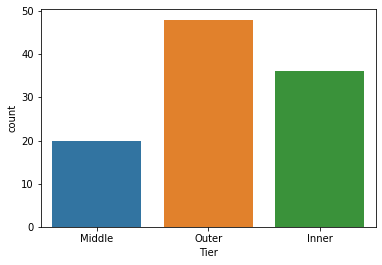

In [ ]:
sns.countplot(x ='Tier', data = df)   # will plot total count of each category in a particular column

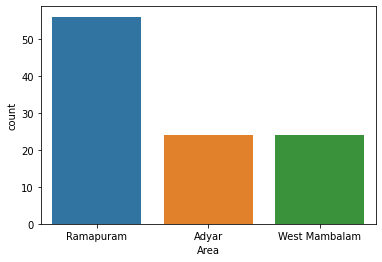

In [ ]:
sns.countplot(x ='Area', data = df)

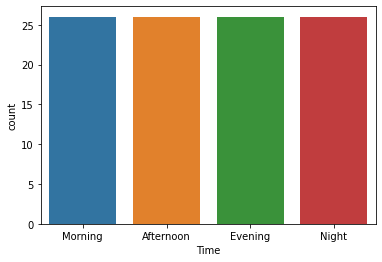

In [ ]:
sns.countplot(x ='Time', data = df)

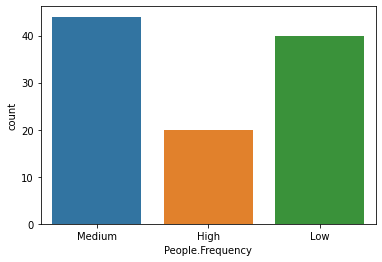

In [ ]:
sns.countplot(x ='People.Frequency', data = df)

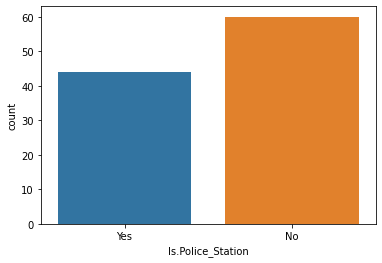

In [ ]:
sns.countplot(x ='Is.Police_Station', data = df)

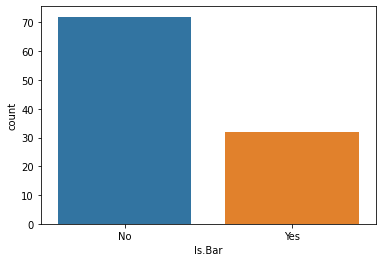

In [ ]:
sns.countplot(x ='Is.Bar', data = df)

In [ ]:
sns.countplot(x ='Residence.Level', data = df)

In [ ]:
sns.countplot(x ='Class', data = df)

Encoding Categorical Features

In [ ]:
Time = pd.get_dummies(df['Time'],drop_first = True)  

In [ ]:
Area = pd.get_dummies(df['Area'],drop_first = True)
print(Area)

     Ramapuram  West Mambalam
0            1              0
1            1              0
2            1              0
3            1              0
4            1              0
..         ...            ...
99           1              0
100          0              1
101          0              1
102          0              1
103          0              1

[104 rows x 2 columns]


In [ ]:
People = pd.get_dummies(df['People.Frequency'],drop_first = True)       # People.Frequency cannot be used as variable name because then it searches for a function named Frequency
print(People)                                                           # for class name People

     Low  Medium
0      0       1
1      0       0
2      0       1
3      1       0
4      0       1
..   ...     ...
99     1       0
100    0       0
101    0       1
102    0       0
103    1       0

[104 rows x 2 columns]


In [ ]:
Is_Police_Station = pd.get_dummies(df['Is.Police_Station'],drop_first = True)      
print(Is_Police_Station) 

     Yes
0      1
1      1
2      1
3      1
4      0
..   ...
99     0
100    0
101    0
102    0
103    0

[104 rows x 1 columns]


In [ ]:
Is_Bar = pd.get_dummies(df['Is.Bar'],drop_first = True)      
print(Is_Bar)

     Yes
0      0
1      0
2      0
3      0
4      0
..   ...
99     0
100    0
101    0
102    0
103    0

[104 rows x 1 columns]


In [ ]:
Tier = pd.get_dummies(df['Tier'],drop_first = True)      
print(Tier)



     Middle  Outer
0         1      0
1         1      0
2         1      0
3         1      0
4         0      1
..      ...    ...
99        0      0
100       0      0
101       0      0
102       0      0
103       0      0

[104 rows x 2 columns]


In [ ]:
Residence_Level = pd.get_dummies(df['Residence.Level'],drop_first = True)      
print(Residence_Level)

     Low  Medium
0      0       1
1      0       1
2      0       1
3      0       1
4      0       1
..   ...     ...
99     0       0
100    0       0
101    0       0
102    0       0
103    0       0

[104 rows x 2 columns]


In [ ]:
dff = df.drop(['Area', 'Zone', 'Time', 'People.Frequency', 'Is.Police_Station',
       'Is.Bar', 'Tier', 'Residence.Level'], axis=1, inplace = True)

In [ ]:
df = pd.concat([df,Area, Time, People, Is_Police_Station,
       Is_Bar, Tier, Residence_Level], axis = 1)
print (df)

      Class  Ramapuram  West Mambalam  Evening  Morning  Night  Low  Medium  \
0      Safe          1              0        0        1      0    0       1   
1      Safe          1              0        0        0      0    0       0   
2      Safe          1              0        1        0      0    0       1   
3      Safe          1              0        0        0      1    1       0   
4      Safe          1              0        0        1      0    0       1   
..      ...        ...            ...      ...      ...    ...  ...     ...   
99   Unsafe          1              0        0        0      1    1       0   
100    Safe          0              1        0        1      0    0       0   
101    Safe          0              1        0        0      0    0       1   
102    Safe          0              1        1        0      0    0       0   
103  Unsafe          0              1        0        0      1    1       0   

     Yes  Yes  Middle  Outer  Low  Medium  
0      

In [ ]:
print(df.columns)

Index(['Class', 'Ramapuram', 'West Mambalam', 'Evening', 'Morning', 'Night',
       'Low', 'Medium', 'Yes', 'Yes', 'Middle', 'Outer', 'Low', 'Medium'],
      dtype='object')


Coorelation Matrix

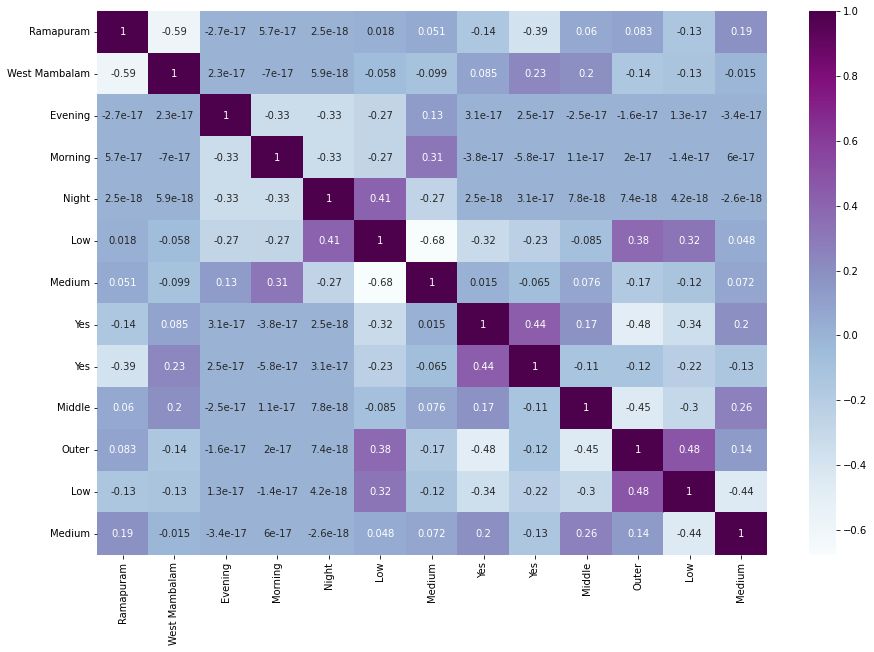

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

In [ ]:
print(df['Class'])

0      0
1      0
2      0
3      0
4      0
      ..
99     1
100    0
101    0
102    0
103    1
Name: Class, Length: 104, dtype: int64


Train Test Split

In [ ]:
# specify input and output attributes
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Model Training

In [ ]:
#plot function
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue', label="Actual")
    plt.scatter(range(len(y_pred)), y_pred, color='red', label="Predicted")
    plt.title(regressorName)
    plt.legend(labels = ('Actual','Predicted'),loc='center right')
    plt.show()
    return

Logistic Regression

In [ ]:
#Implementing Logistic Regression using sklearn
modelLogistic = LogisticRegression()
modelLogistic.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#print the regression coefficients
print("The intercept b0= ", modelLogistic.intercept_)
print("The coefficient b1= ", modelLogistic.coef_)

The intercept b0=  [-2.3164048]
The coefficient b1=  [[-0.01334668 -0.03924188  0.44944228  0.02073832  2.1500961   0.68613548
   0.25144006 -1.18267678 -0.01064743 -0.58226307  1.0093893   0.94315708
   0.00560865]]


In [ ]:
#Make prediction for the test data
y_pred= modelLogistic.predict(x_test)

In [ ]:
print("Accuracy is", modelLogistic.score(x_test, y_test)*100)
# cross validation - it is used for better validation of model
# eg: cv-5, train-4, test-1
score = cross_val_score(modelLogistic, X, y, cv=5)
print("Cross validation is",np.mean(score)*100)

Accuracy is 65.38461538461539
Cross validation is 79.9047619047619


In [ ]:
#Creating confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred)
print(ConfusionMatrix)

[[14  3]
 [ 6  3]]


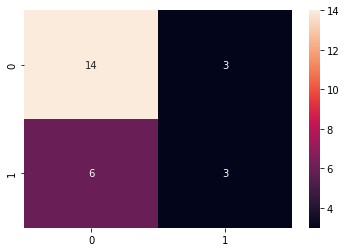

In [ ]:
sns.heatmap(ConfusionMatrix, annot=True)

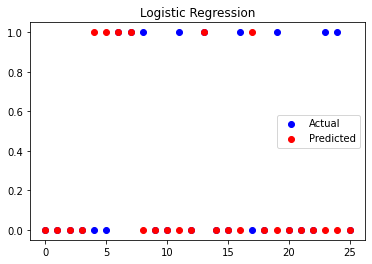

In [ ]:
plotGraph(y_test, y_pred, "Logistic Regression")

Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
modelDecision = DecisionTreeClassifier()

In [ ]:
modelDecision.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
#Make prediction for the test data
y_pred= modelDecision.predict(x_test)

In [ ]:
print("Accuracy is", modelDecision.score(x_test, y_test)*100)
# cross validation - it is used for better validation of model
# eg: cv-5, train-4, test-1
score = cross_val_score(modelDecision, X, y, cv=5)
print("Cross validation is",np.mean(score)*100)

Accuracy is 84.61538461538461
Cross validation is 81.8095238095238


In [ ]:
#Creating confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred)
print(ConfusionMatrix)

[[16  1]
 [ 3  6]]


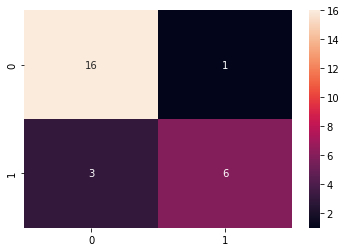

In [ ]:
sns.heatmap(ConfusionMatrix, annot=True)

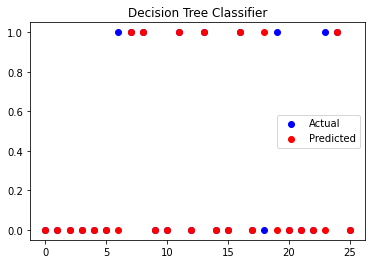

In [ ]:
plotGraph(y_test, y_pred, "Decision Tree Classifier")

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
modelForest = RandomForestClassifier()

In [ ]:
modelForest.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
#Make prediction for the test data
y_pred= modelForest.predict(x_test)

In [ ]:
print("Accuracy is", modelForest.score(x_test, y_test)*100)
# cross validation - it is used for better validation of model
# eg: cv-5, train-4, test-1
score = cross_val_score(modelForest, X, y, cv=5)
print("Cross validation is",np.mean(score)*100)

Accuracy is 84.61538461538461
Cross validation is 82.8095238095238


In [ ]:
#Creating confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred)
print(ConfusionMatrix)

[[16  1]
 [ 3  6]]


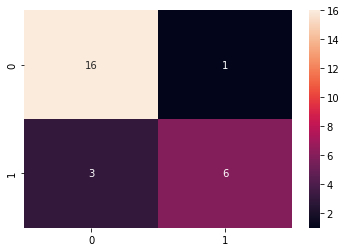

In [ ]:
sns.heatmap(ConfusionMatrix, annot=True)

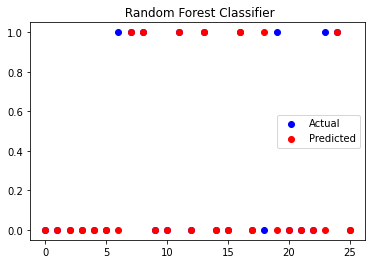

In [ ]:
plotGraph(y_test, y_pred, " Random Forest Classifier")

Extra Trees Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
modelExtra = ExtraTreesClassifier()

In [ ]:
modelExtra.fit(x_train, y_train)

ExtraTreesClassifier()

In [ ]:
#Make prediction for the test data
y_pred= modelExtra.predict(x_test)

In [ ]:
print("Accuracy is", modelExtra.score(x_test, y_test)*100)
# cross validation - it is used for better validation of model
# eg: cv-5, train-4, test-1
score = cross_val_score(modelForest, X, y, cv=5)
print("Cross validation is",np.mean(score)*100)

Accuracy is 80.76923076923077
Cross validation is 82.76190476190477


In [ ]:
#Creating confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred)
print(ConfusionMatrix)

[[15  2]
 [ 3  6]]


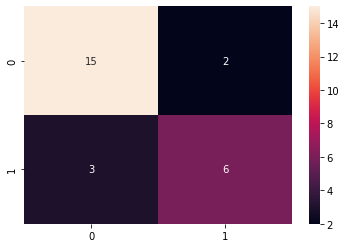

In [ ]:
sns.heatmap(ConfusionMatrix, annot=True)

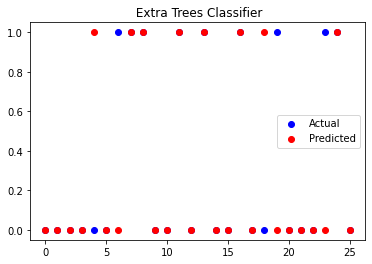

In [ ]:
plotGraph(y_test, y_pred, " Extra Trees Classifier")

Hyperparameter tuning

In [ ]:
modelForest = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
modelForest.fit(x_train, y_train)
#Make prediction for the test data
y_pred= modelForest.predict(x_test)
print("Accuracy is", modelForest.score(x_test, y_test)*100)
# cross validation - it is used for better validation of model
# eg: cv-5, train-4, test-1
score = cross_val_score(modelForest, X, y, cv=5)
print("Cross validation is",np.mean(score)*100)

Accuracy is 69.23076923076923
Cross validation is 74.04761904761904
